## Handson  of Feature Scaling - Part2

 - sklearn - Min-Max Scaler - Normalization
 - sklearn - Standard Scaler - Standardization
 - sklearn - RobustScaler

#### Which technique we should use Normalization or Standardization?

  - Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
  - Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.
  - There is no any thumb rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.
  **It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process.*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# load the other dataset
df_country = pd.read_excel(r"D:\Notebooks\Practice CML and me\all_ml_dl\Data\Data_Files\Feature_Engineering\Scaling.xlsx")
df_country                      

,Experience,Salary,Country_Type
0,1,30,Devloping
1,3,35,Developed
2,4,43,Devloping
3,5,36,Developed
4,6,27,Devloping
5,4,32,Developed
6,5,18,Developed
7,3,10,Developed
8,2,12,Devloping
9,5,11,Devloping


In [3]:
X = df_country.drop("Country_Type",axis=1)
y = df_country["Country_Type"]

In [4]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(15, 2)
(15,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# First we will devide the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10, 2)
(10,)
(5, 2)
(5,)


In [8]:
df_exp = X_train

In [9]:
df_exp

,Experience,Salary
8,2,12
2,4,43
1,3,35
14,1,8
4,6,27
7,3,10
10,4,37
12,3,14
3,5,36
6,5,18


In [10]:
X_test

,Experience,Salary
9,5,11
11,5,21
0,1,30
13,2,16
5,4,32


### Min-Max Scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Create the object
minmax_scale = MinMaxScaler()
# fit on the train dataset
minmax_scale.fit((df_exp))
# transform the train dataset columns ("Experience" and "Salary")
df_exp_minmax = minmax_scale.transform(df_exp)
print(type(df_exp_minmax))
df_exp_minmax_new = pd.DataFrame(df_exp_minmax,columns=["Experience","Salary"])
df_exp_minmax_new

<class 'numpy.ndarray'>


,Experience,Salary
0,0.2,0.114286
1,0.6,1.000000
2,0.4,0.771429
3,0.0,0.000000
4,1.0,0.542857
5,0.4,0.057143
6,0.6,0.828571
7,0.4,0.171429
8,0.8,0.800000
9,0.8,0.285714


In [13]:
# To avoid the data leakage we fisrt split the dataset then wecreate object and fit of train dataset
# and use that fit to transform the test dataset
# transform the test dataset using train dataset fit ("Experience" and "Salary")
X_test_minmax = minmax_scale.transform(X_test)
print(type(X_test_minmax))
df_test_minmax_new = pd.DataFrame(X_test_minmax,columns=["Experience","Salary"])
df_test_minmax_new

<class 'numpy.ndarray'>


,Experience,Salary
0,0.8,0.085714
1,0.8,0.371429
2,0.0,0.628571
3,0.2,0.228571
4,0.6,0.685714


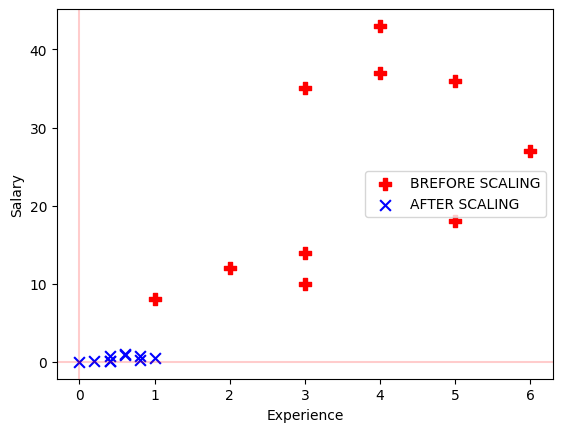

In [14]:
ax = df_exp.plot.scatter(x="Experience", y="Salary",marker = "P",s=80, label='BREFORE SCALING',color='red')
df_exp_minmax_new.plot.scatter(x="Experience", y="Salary",marker = "x",s=60,label='AFTER SCALING',
                               color='blue', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

### Standard Scaler

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# create the object
std_scale = StandardScaler()
# fit and transform the columns ("Experience" and "Salary")
df_exp_std = std_scale.fit_transform(df_exp.iloc[:,0:2])
print(type(df_exp_std))
df_exp_std_new = pd.DataFrame(df_exp_std,columns=["Experience","Salary"])
df_exp_std_new

<class 'numpy.ndarray'>


,Experience,Salary
0,-1.120224,-0.968246
1,0.280056,1.533056
2,-0.420084,0.887559
3,-1.820364,-1.290994
4,1.680336,0.242061
5,-0.420084,-1.129620
6,0.280056,1.048933
7,-0.420084,-0.806872
8,0.980196,0.968246
9,0.980196,-0.484123


In [17]:
print("std: ",round(df_exp_std_new.Experience.std(),0))
print("mean: ",round(df_exp_std_new.Experience.mean(),2))

std:  1.0
mean:  -0.0
